In [1]:
ENV["COLUMNS"] = 1000
ENV["LINES"] = 100

100

In [2]:
using CSV
using Chain
using DataFrames
using DataFramesMeta
using Dates
using Impute
using Plots
using ShiftedArrays
using StatsPlots
using Statistics
#plotlyjs()
gr()

Plots.GRBackend()

In [3]:
stats_df = CSV.read("analysis_dockerstats.csv", DataFrame)
stats_df.date = Date.(stats_df.date, "mm/dd/yyyy")
stats_df = select(stats_df, Not(:user))


,date,namespace,name,last_updated,pull_count
,Date,String7,String,Date,Int64
1,2021-06-21,intel,pmem-csi-driver,2021-06-21,310590
2,2021-06-21,intel,intel-gpu-plugin,2021-06-18,136290
3,2021-06-21,intel,pmem-csi-driver-test,2021-06-21,120377
4,2021-06-21,intel,intel-gpu-initcontainer,2021-06-18,110022
5,2021-06-21,intel,oneapi-hpckit,2021-04-01,30967
6,2021-06-21,intel,oneapi-basekit,2021-04-01,14703
7,2021-06-21,intel,intel-deviceplugin-operator,2021-06-18,10540
8,2021-06-21,intel,intel-qat-plugin,2021-06-18,7283
9,2021-06-21,intel,intel-optimized-tensorflow,2021-06-05,6615


In [4]:
describe(stats_df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,date,,2021-06-21,2021-09-08,2022-06-25,0,Date
2,namespace,,intel,,rocm,0,String7
3,name,,apphsm,,vulkan,0,String
4,last_updated,,2017-11-06,2021-07-28,2022-06-23,0,Date
5,pull_count,1.52585e6,4,4478.0,75765469,0,Int64


In [5]:
intel_df = @chain stats_df begin
    filter(:namespace => ==(["intel", ""]), _)
end

nv_df = @chain stats_df begin
    filter(:namespace => ==("nvidia"), _)
end

rcom_df = @chain stats_df begin
    filter(:namespace => ==("rocm"), _)
end

,date,namespace,name,last_updated,pull_count
,Date,String7,String,Date,Int64
1,2021-06-21,rocm,tensorflow,2021-06-11,165888
2,2021-06-21,rocm,dev-ubuntu-16.04,2020-06-26,73696
3,2021-06-21,rocm,k8s-device-plugin,2021-05-04,42603
4,2021-06-21,rocm,pytorch,2021-06-11,34000
5,2021-06-21,rocm,rocm-terminal,2021-06-11,29213
6,2021-06-21,rocm,dev-centos-7,2021-06-11,25341
7,2021-06-21,rocm,dev-ubuntu-18.04,2021-06-11,14537
8,2021-06-21,rocm,tensorflow-autobuilds,2021-06-21,10851
9,2021-06-21,rocm,dev-ubuntu-20.04,2021-06-11,3677


In [6]:
hpckit = @chain stats_df begin
    filter(:name => ==("oneapi-hpckit"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

basekit = @chain stats_df begin
    filter(:name => ==("oneapi-basekit"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

aikit = @chain stats_df begin
    filter(:name => ==("oneapi-aikit"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

oneapi = @chain stats_df begin
    filter(:name => ==("oneapi"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end


iotkit = @chain stats_df begin
    filter(:name => ==("oneapi-iotkit"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

dlkit = @chain stats_df begin
    filter(:name => ==("oneapi-dlfdkit"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

intel_tf = @chain stats_df begin
    filter(:name => ==("intel-optimized-tensorflow"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

intel_pyt = @chain stats_df begin
    filter(:name => ==("intel-optimized-pytorch"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

cuda = @chain stats_df begin
    filter(:name => ==("cuda"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

r_tf = @chain rcom_df begin
    filter(:name => ==("tensorflow"), _)
    select(_, Not(:namespace))
    transform(_, :pull_count => (p -> p-lag(p)) => :pull_count_per_day)
    transform(_, :date => (d -> yearmonth.(d)) => :date_year_month)
    transform(_, :date => (d -> year.(d)) => :date_year)
    transform(_, :date => (d -> month.(d)) => :date_month)
    transform(_, :last_updated => (d -> yearmonth.(d)) => :img_updated_year_month)
    rename(_, :last_updated => :img_last_updated_date)
    dropmissing(_)
end

oneapi_all = vcat(basekit, hpckit, aikit, iotkit, oneapi, dlkit)
intel_dl = vcat(intel_pyt, intel_tf)

,date,name,img_last_updated_date,pull_count,pull_count_per_day,date_year_month,date_year,date_month,img_updated_year_month
,Date,String,Date,Int64,Int64,Tuple…,Int64,Int64,Tuple…
1,2021-06-22,intel-optimized-pytorch,2020-12-12,262,9,"(2021, 6)",2021,6,"(2020, 12)"
2,2021-06-23,intel-optimized-pytorch,2020-12-12,262,0,"(2021, 6)",2021,6,"(2020, 12)"
3,2021-06-24,intel-optimized-pytorch,2020-12-12,264,2,"(2021, 6)",2021,6,"(2020, 12)"
4,2021-06-25,intel-optimized-pytorch,2020-12-12,268,4,"(2021, 6)",2021,6,"(2020, 12)"
5,2021-06-25,intel-optimized-pytorch,2020-12-12,268,0,"(2021, 6)",2021,6,"(2020, 12)"
6,2021-06-26,intel-optimized-pytorch,2020-12-12,268,0,"(2021, 6)",2021,6,"(2020, 12)"
7,2021-06-27,intel-optimized-pytorch,2020-12-12,268,0,"(2021, 6)",2021,6,"(2020, 12)"
8,2021-06-28,intel-optimized-pytorch,2020-12-12,268,0,"(2021, 6)",2021,6,"(2020, 12)"
9,2021-06-29,intel-optimized-pytorch,2020-12-12,274,6,"(2021, 6)",2021,6,"(2020, 12)"


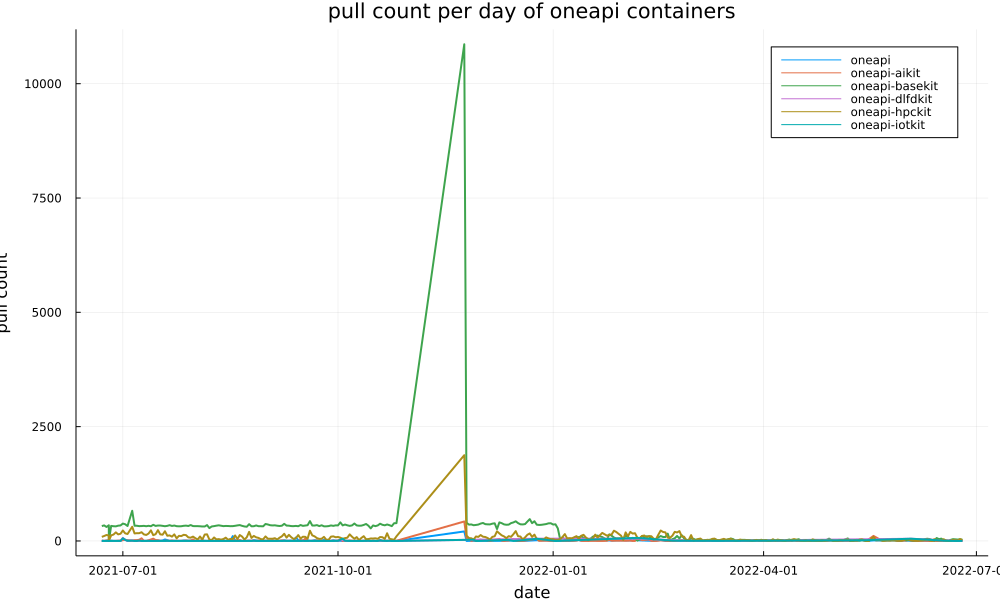

In [7]:
oneapi_plt_per_day = @df oneapi_all plot(
    :date,
    :pull_count_per_day,
    group = :name,
    lw=2,
    title="pull count per day of oneapi containers",
    xlabel="date",
    ylabel="pull count",
    size=(1000, 600)
    
)

It seems like we have significant missing values for 2021 11, lets count the num date per month and see

In [8]:
#print(combine(groupby(cuda, [:date_year_month]), nrow=> :count))
#print(combine(groupby(r_tf, [:date_year_month]), nrow=> :count))
print(combine(groupby(basekit, [:date_year_month]), nrow=> :count))

13×2 DataFrame
 Row │ date_year_month  count 
     │ Tuple…           Int64 
─────┼────────────────────────
   1 │ (2021, 6)           10
   2 │ (2021, 7)           30
   3 │ (2021, 8)           31
   4 │ (2021, 9)           30
   5 │ (2021, 10)          26
   6 │ (2021, 11)           7
   7 │ (2021, 12)          31
   8 │ (2022, 1)           29
   9 │ (2022, 2)           28
  10 │ (2022, 3)           28
  11 │ (2022, 4)           30
  12 │ (2022, 5)           30
  13 │ (2022, 6)           25

We only have 7 records for november 2021, let's print it

In [9]:
ENV["LINES"] = 60
@chain basekit begin
    filter(:date_year_month => in([(2021, 11), (2021, 10), (2021, 12)]), _)
end

,date,name,img_last_updated_date,pull_count,pull_count_per_day,date_year_month,date_year,date_month,img_updated_year_month
,Date,String,Date,Int64,Int64,Tuple…,Int64,Int64,Tuple…
1,2021-10-01,oneapi-basekit,2021-07-01,48675,340,"(2021, 10)",2021,10,"(2021, 7)"
2,2021-10-02,oneapi-basekit,2021-10-01,49081,406,"(2021, 10)",2021,10,"(2021, 10)"
3,2021-10-03,oneapi-basekit,2021-10-01,49421,340,"(2021, 10)",2021,10,"(2021, 10)"
4,2021-10-04,oneapi-basekit,2021-10-01,49780,359,"(2021, 10)",2021,10,"(2021, 10)"
5,2021-10-05,oneapi-basekit,2021-10-01,50122,342,"(2021, 10)",2021,10,"(2021, 10)"
6,2021-10-06,oneapi-basekit,2021-10-01,50452,330,"(2021, 10)",2021,10,"(2021, 10)"
7,2021-10-07,oneapi-basekit,2021-10-01,50792,340,"(2021, 10)",2021,10,"(2021, 10)"
8,2021-10-08,oneapi-basekit,2021-10-01,51173,381,"(2021, 10)",2021,10,"(2021, 10)"
9,2021-10-09,oneapi-basekit,2021-10-01,51513,340,"(2021, 10)",2021,10,"(2021, 10)"


As some days of data are missing, lets analyize this using montly mean data rather than absolute. Let's first replace the anomalous value for pull count per day for 2021-11-24. The reason the value is big 10863 is because, when we take lag, as values for close to a month are missing, the difference is large.

In [10]:
filter(:pull_count_per_day => ==(10863), basekit)


,date,name,img_last_updated_date,pull_count,pull_count_per_day,date_year_month,date_year,date_month,img_updated_year_month
,Date,String,Date,Int64,Int64,Tuple…,Int64,Int64,Tuple…
1,2021-11-24,oneapi-basekit,2021-10-01,68254,10863,"(2021, 11)",2021,11,"(2021, 10)"


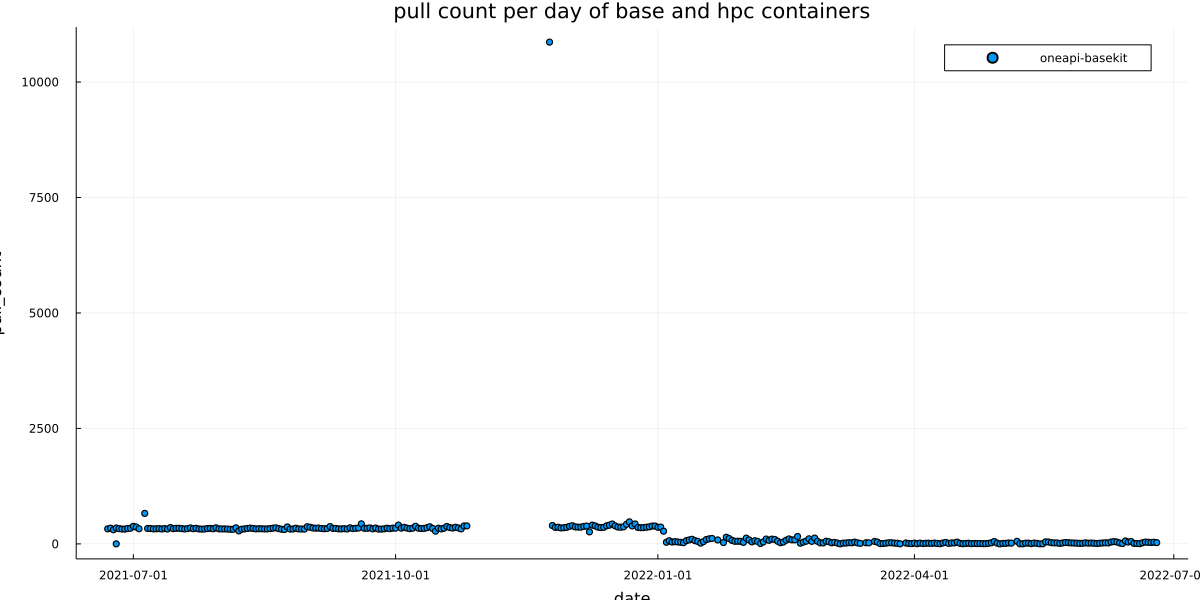

In [11]:
basekit_plt_per_day = @df basekit plot(
    :date,
    :pull_count_per_day,
    group= :name,
    lw=2,
    title="pull count per day of base and hpc containers",
    xlabel="date",
    ylabel="pull_count",
    size=(1200, 600),
    seriestype=:scatter
)

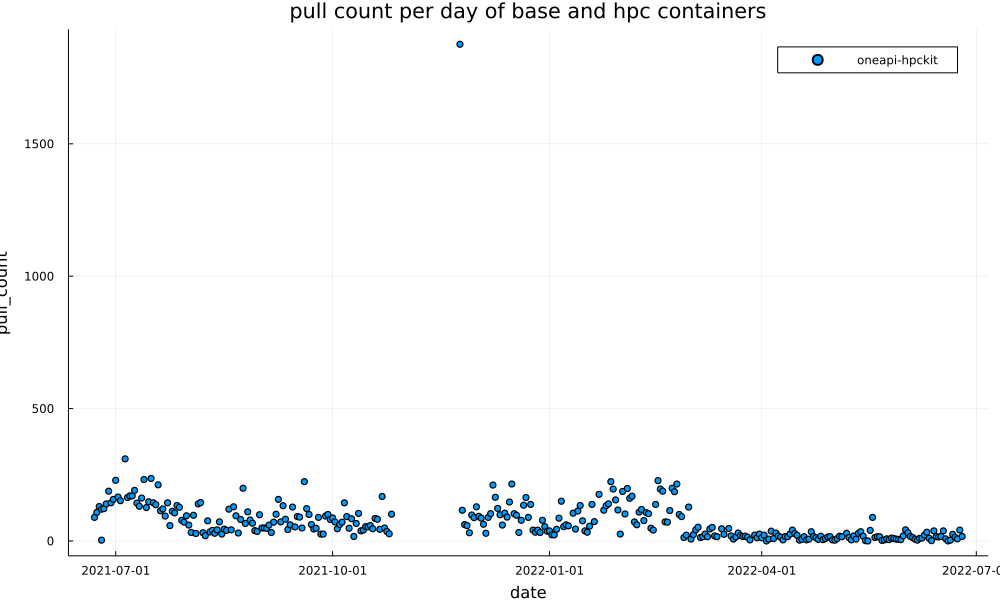

In [12]:
base_hpckit = vcat(basekit, hpckit)

hpckit_plt_per_day = @df hpckit plot(
    :date,
    :pull_count_per_day,
    group= :name,
    lw=2,
    title="pull count per day of base and hpc containers",
    xlabel="date",
    ylabel="pull_count",
    size=(1000, 600),
    seriestype=:scatter
)

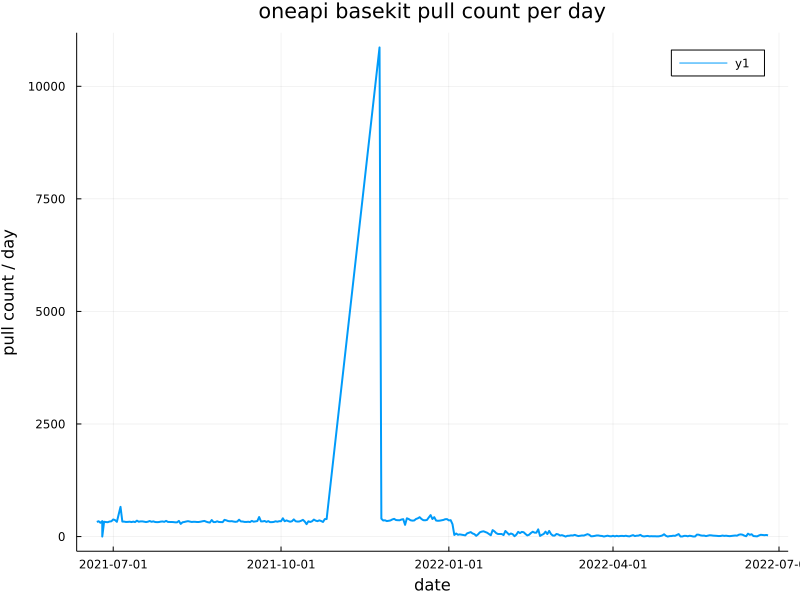

In [13]:
@df basekit plot(
    :date,
    :pull_count_per_day,
    lw=2,
    title="oneapi basekit pull count per day",
    xlabel="date",
    ylabel="pull count / day",
    size=(800, 600)
)

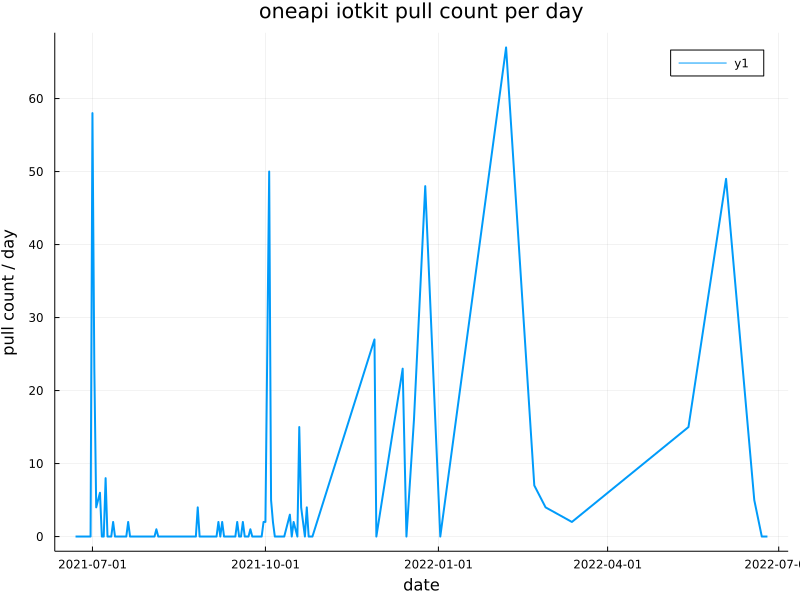

In [14]:
@df iotkit plot(
    :date,
    :pull_count_per_day,
    lw=2,
    title="oneapi iotkit pull count per day",
    xlabel="date",
    ylabel="pull count / day",
    size=(800, 600)
)

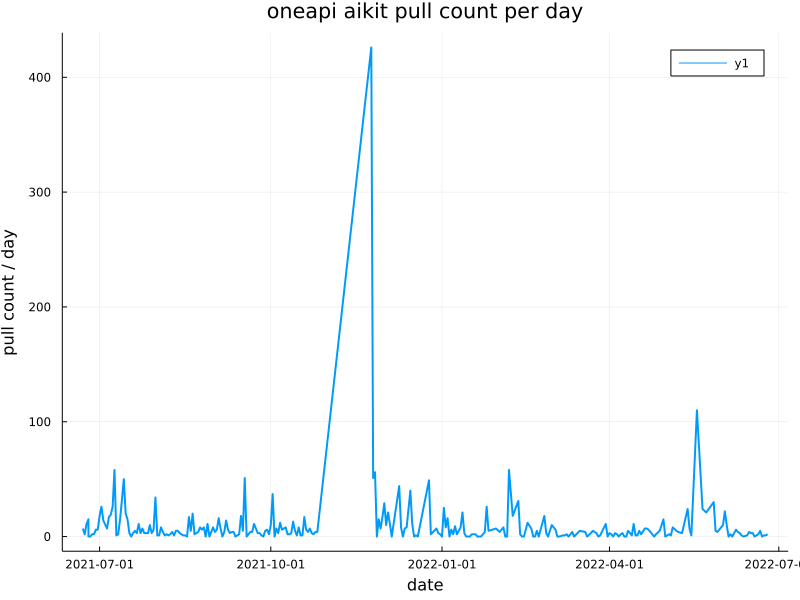

In [15]:
@df aikit plot(
    :date,
    :pull_count_per_day,
    lw=2,
    title="oneapi aikit pull count per day",
    xlabel="date",
    ylabel="pull count / day",
    size=(800, 600)
)

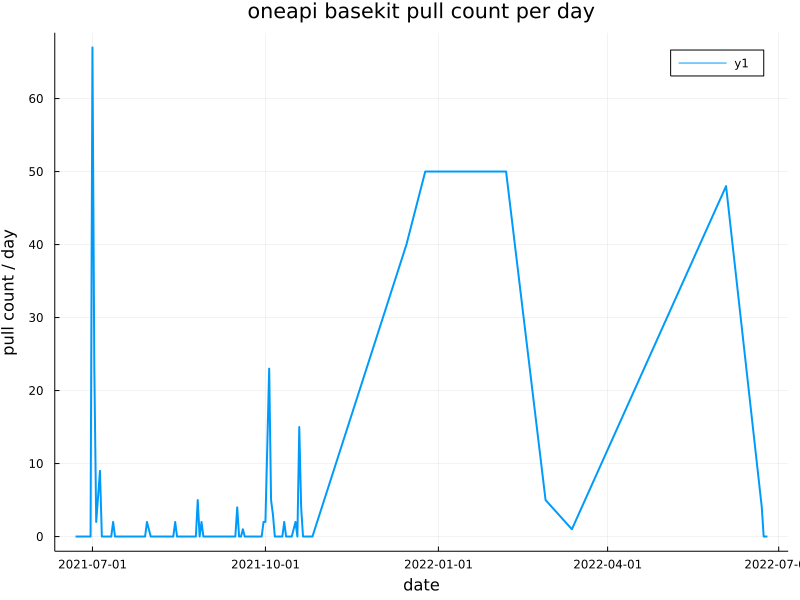

In [16]:
@df dlkit plot(
    :date,
    :pull_count_per_day,
    lw=2,
    title="oneapi basekit pull count per day",
    xlabel="date",
    ylabel="pull count / day",
    size=(800, 600)
)

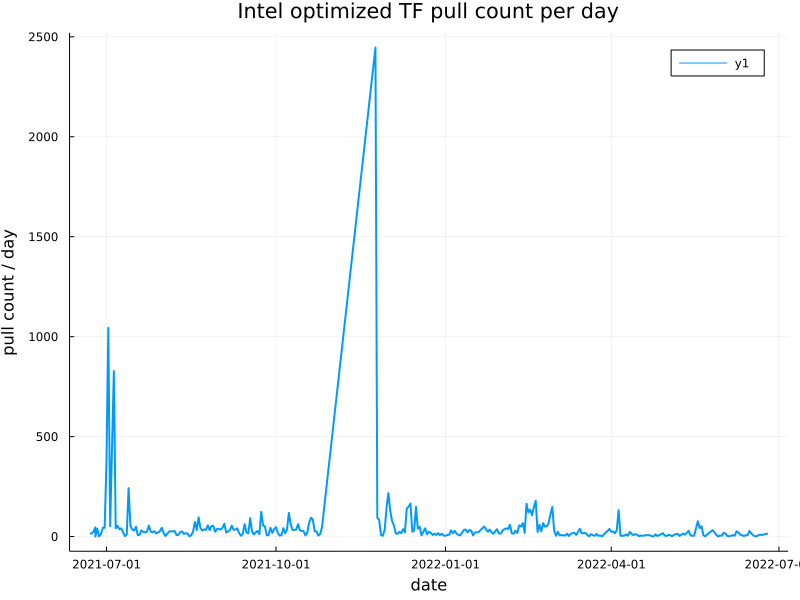

In [17]:
@df dropmissing(intel_tf) plot(
    :date,
    :pull_count_per_day,
    lw=2,
    title="Intel optimized TF pull count per day",
    xlabel="date",
    ylabel="pull count / day",
    size=(800, 600)
)

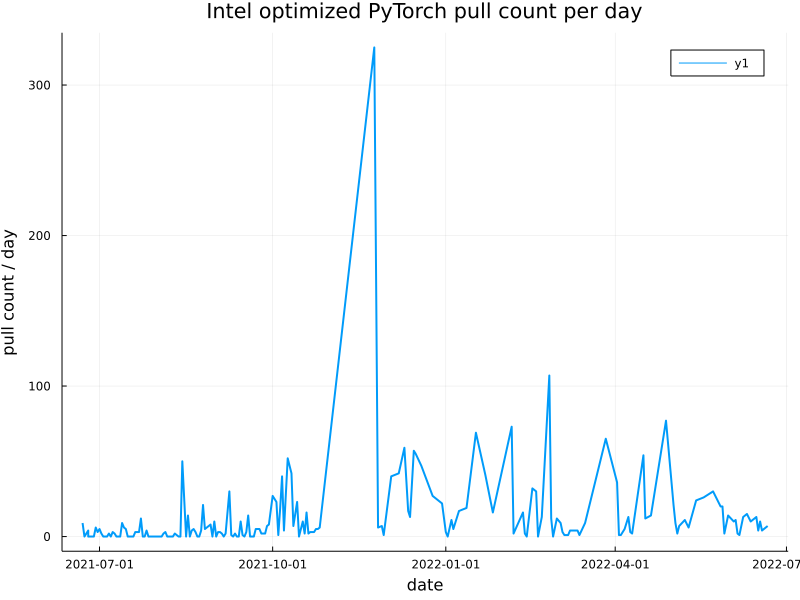

In [18]:
@df intel_pyt plot(
    :date,
    :pull_count_per_day,
    lw=2,
    title="Intel optimized PyTorch pull count per day",
    xlabel="date",
    ylabel="pull count / day",
    size=(800, 600)
)

In [ ]:
basekit_pull_per_month = combine(groupby(basekit, [:date_year,:date_month, :name]), :pull_count_per_day => sum => :pull_count_per_month)
hpckit_pull_per_month = combine(groupby(hpckit, [:date_year,:date_month, :name]), :pull_count_per_day => sum => :pull_count_per_month)
aikit_pull_per_month = combine(groupby(aikit, [:date_year,:date_month, :name]), :pull_count_per_day => sum => :pull_count_per_month)
iotit_pull_per_month = combine(groupby(iotkit, [:date_year,:date_month, :name]), :pull_count_per_day => sum => :pull_count_per_month)
intel_tf_pull_per_month = combine(groupby(intel_tf, [:date_year,:date_month, :name]), :pull_count_per_day => sum => :pull_count_per_month)
intel_pyt_pull_per_month = combine(groupby(intel_pyt, [:date_year,:date_month, :name]), :pull_count_per_day => sum => :pull_count_per_month)

intel_per_month = vcat(
    basekit_pull_per_month, 
    hpckit_pull_per_month, 
    aikit_pull_per_month, 
    iotit_pull_per_month,
    intel_tf_pull_per_month,
    intel_pyt_pull_per_month,
    )
intel_per_month = transform(intel_per_month, [:date_year, :date_month] => ((y,m) -> Date.(y,m)) => :plot_date)
intel_per_month.pull_count_per_month = convert.(Float64, intel_per_month.pull_count_per_month)


In [20]:
# hack to interpolate anomalous data - remove data for month 11 in 2021 and impute it using interpolation
intel_per_month.pull_count_per_month = @. ifelse(intel_per_month.date_month == 11, missing, intel_per_month.pull_count_per_month)
intel_per_month = Impute.interp(intel_per_month)

,date_year,date_month,name,pull_count_per_month,plot_date
,Int64,Int64,String,Float64?,Date
1,2021,6,oneapi-basekit,2957.0,2021-06-01
2,2021,7,oneapi-basekit,10331.0,2021-07-01
3,2021,8,oneapi-basekit,10166.0,2021-08-01
4,2021,9,oneapi-basekit,10178.0,2021-09-01
5,2021,10,oneapi-basekit,9056.0,2021-10-01
6,2021,11,oneapi-basekit,10402.0,2021-11-01
7,2021,12,oneapi-basekit,11748.0,2021-12-01
8,2022,1,oneapi-basekit,2700.0,2022-01-01
9,2022,2,oneapi-basekit,1943.0,2022-02-01


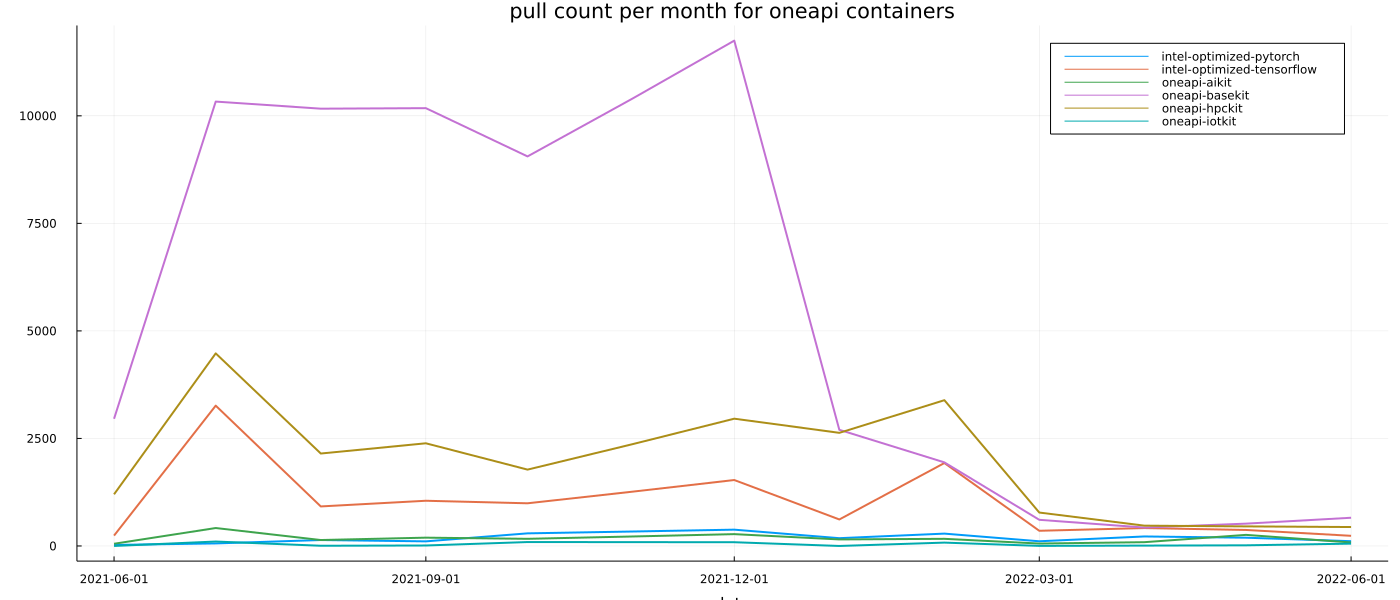

In [21]:
plt = @df intel_per_month plot(
    :plot_date,
    :pull_count_per_month,
    group = :name,
    lw=2,
    title="pull count per month for oneapi containers",
    xlabel="date",
    ylabel="pull count per month",
    size=(1400, 600),
    seriestype=[:path]
)


As we can see, there is a sudden drop in the containers being pulled, most pronounced for oneapi-basekit , aikit and intel-tensorflow

In [22]:
#using GLM

In [23]:
#r = lm(@formula(pull_count_per_day ~ date), intel_tf)

In [24]:
#pred = predict(r, dropmissing(intel_tf), interval = :confidence, level = 0.95)